In [10]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")

In [12]:
# Load data
path = "../data/raw/superstore.csv"
df = pd.read_csv(path, low_memory=False)
# Ensure Sales is numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Sales by Customer Segment

Next we aggregate `Sales` by `Segment` (e.g., Consumer, Corporate, Home Office) to see which customer segments drive revenue.

In [7]:
# Aggregate total sales by Segment
seg_agg = df.groupby('Segment', dropna=False)['Sales'].sum().reset_index()
seg_agg = seg_agg.sort_values('Sales', ascending=False)
seg_agg

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


/var/folders/3f/p17cpp_d2wn8_snpn5nbjrc80000gn/T/ipykernel_3805/3705832624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=seg_agg, x='Segment', y='Sales', palette='Greens_d')


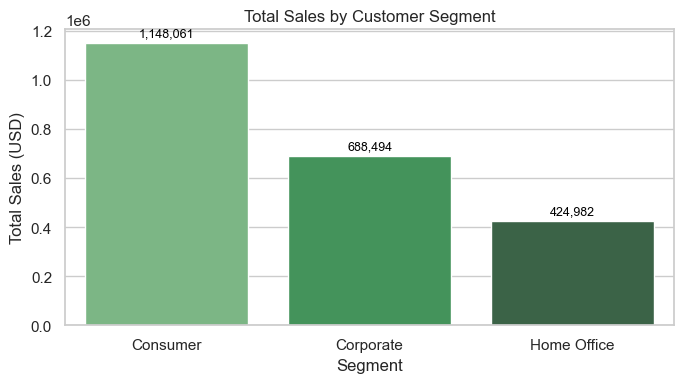

In [8]:
# Bar chart of total sales by Segment
plt.figure(figsize=(7,4))
ax = sns.barplot(data=seg_agg, x='Segment', y='Sales', palette='Greens_d')
ax.set_title('Total Sales by Customer Segment')
ax.set_ylabel('Total Sales (USD)')
ax.set_xlabel('Segment')
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3), textcoords='offset points')
plt.tight_layout()
plt.show()

In [15]:
# Export processed CSVs from this notebook's `df` and `seg_agg` variables
import os
out_dir = os.path.join('..','data','processed')
os.makedirs(out_dir, exist_ok=True)
# Ensure Order Date is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
# monthly sales (if Monthly exists in this notebook) or compute from Order Date
if 'Order Date' in df.columns:
    df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
    monthly = df.groupby('Month', dropna=False)['Sales'].sum().reset_index()
    monthly.to_csv(os.path.join(out_dir, 'monthly_sales.csv'), index=False)
    print('Wrote', os.path.join(out_dir, 'monthly_sales.csv'))
# segment and category exports
if 'seg_agg' in globals():
    seg_agg.to_csv(os.path.join(out_dir, 'sales_by_segment.csv'), index=False)
    print('Wrote', os.path.join(out_dir, 'sales_by_segment.csv'))
if 'Category' in df.columns:
    df.groupby('Category')['Sales'].sum().reset_index().to_csv(os.path.join(out_dir, 'sales_by_category.csv'), index=False)
    print('Wrote', os.path.join(out_dir, 'sales_by_category.csv'))
    monthly_cat = df.groupby([pd.to_datetime(df['Order Date']).dt.to_period('M').dt.to_timestamp().rename('Month'), 'Category'])['Sales'].sum().reset_index().pivot(index='Month', columns='Category', values='Sales').fillna(0)
    monthly_cat.index.name = 'Month'
    monthly_cat.to_csv(os.path.join(out_dir, 'monthly_sales_by_category.csv'))
    print('Wrote', os.path.join(out_dir, 'monthly_sales_by_category.csv'))
print('Export complete')

Wrote ../data/processed/monthly_sales.csv
Wrote ../data/processed/sales_by_segment.csv
Wrote ../data/processed/sales_by_category.csv
Wrote ../data/processed/monthly_sales_by_category.csv
Export complete
